# Préparation des données 

### Importation des Bibliotheques necessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

### Importation des Données

In [1]:
raw_data = pd.read_excel("d:/Study/Projects/Econometrie/diamonds.xlsx")
raw_data

NameError: name 'pd' is not defined

In [3]:
data = raw_data
data = data.drop("Unnamed: 0", axis = 1)

### Inspection des données

In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### On remarque que les valeurs minimales de "x", "y" et "z" sont 0.00000000 => ce n'est pas possible d'avoir ces valeurs,
####  ces valeurs sont erronées, Il faut donc les éliminer.

### Suppression des valeurs erronées 

In [5]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]
print(len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)]), "Observations ont été eliminées")
data.describe()

0 Observations ont été eliminées


,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Première Phase : Modèle sans variables qualitatives

### Enlèvement des variables qualitatives   

In [6]:
data = data.drop(["cut", "color", "clarity"], axis = 1)
data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Inspection des corrélations entre toutes les variables pour vérifier la "multicolinéarité" a l'aide d'une matrice des corrélations

Text(0.5, 1, 'Matrice de correlation')

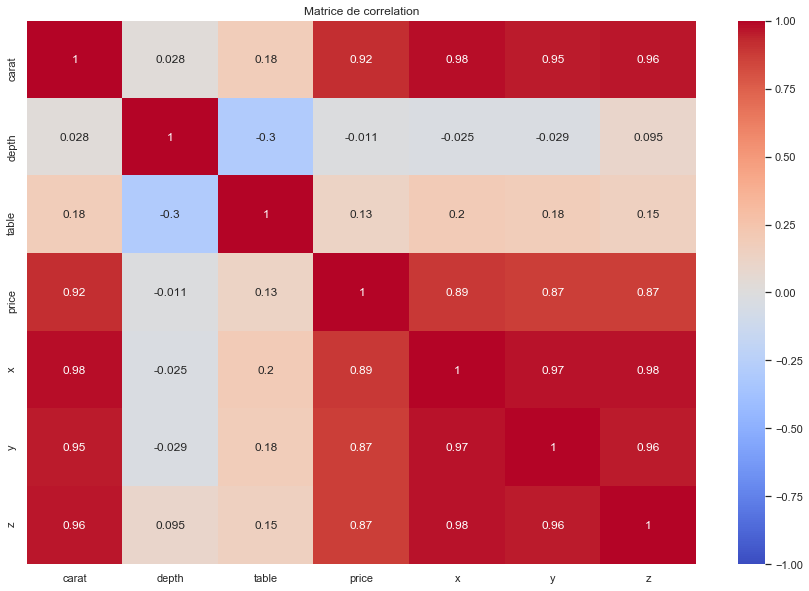

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Matrice de correlation")

### Estimation du Modèle avec les variables "x", "y" et "z"

In [8]:
y = data["price"]
x1 = data[["carat", "depth", "table", "x", "y", "z"]]
x = sm.add_constant(x1)
reg1 = sm.OLS(y, x).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 5.505e+04
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:08:17   Log-Likelihood:            -4.7061e+05
No. Observations:               53920   AIC:                         9.412e+05
Df Residuals:                   53913   BIC:                         9.413e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e+04    456.639     46.682      0.000    2.04e+04    2.22e+04
carat       1.099e+04     66.978    164.062      0.000    1.09e+04    1.11e+04
depth       -203.0201      5.658    -35.882      0.000    -214.110    -191.930
table       -101.9364      3.079    -33.108      0.000    -107.971     -95.902
x          -1412.9648     45.781    -30.863      0.000   -1502.697   -1323.233
y             88.1662     25.683      3.433      0.001      37.828     138.504
z            -46.5781     50.091     -0.930      0.352    -144.757      51.601
==============================================================================
Omnibus:                    14157.382   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409714.584
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                      16.441   Cond. No.                     6.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Le model est puissant avec un R_Carré = 0.86, et on remarque que la variable "length" avec une P>0.05 n'est pas significative.

### Estimation du Modèle sans les variables "x", "y" et "z"

In [9]:
y = data["price"]
x1 = data[["carat", "depth", "table"]]
x = sm.add_constant(x1)
reg2 = sm.OLS(y, x).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:08:17   Log-Likelihood:            -4.7174e+05
No. Observations:               53920   AIC:                         9.435e+05
Df Residuals:                   53916   BIC:                         9.435e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.301e+04    390.842     33.284      0.000    1.22e+04    1.38e+04
carat       7858.0632     14.152    555.253      0.000    7830.325    7885.802
depth       -151.4453      4.819    -31.426      0.000    -160.891    -142.000
table       -104.3284      3.141    -33.219      0.000    -110.484     -98.173
==============================================================================
Omnibus:                    14098.572   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154432.961
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                      11.073   Cond. No.                     5.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Malgré la suppression de trois variables "x", "y" et "z", La puissance explicative de notre modèle na pas diminuée 
#### significativement avec le R_carré precedant = 0.86 contre un R_crré actuellement = 0.854, d'ou on garde ce dernier modéle. 

### Examination des Erreurs  (Residus)

la moyenne des residus est egale a  0.0


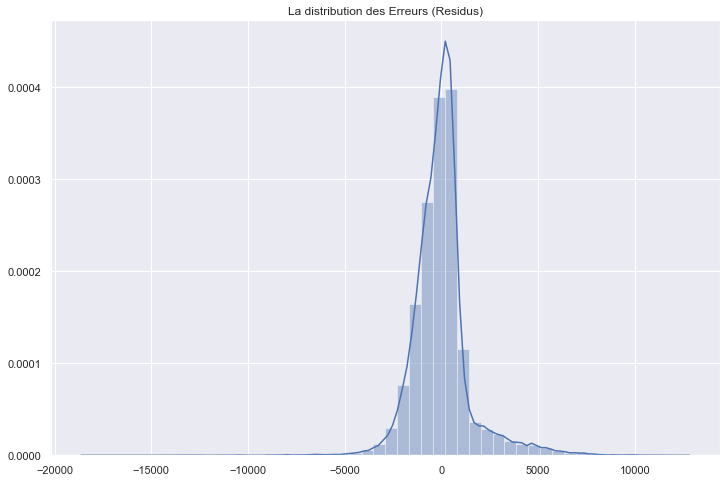

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(reg2.resid)
plt.title("La distribution des Erreurs (Residus)")
print("la moyenne des residus est egale a ",np.round(reg2.resid.mean()))

#### Selon le graph, la distribution des Erreurs qui est supposé suivre une loi Normale n’est pas parfaitement Normalere une loi 
#### Normale

Text(0, 0.5, 'Residus')

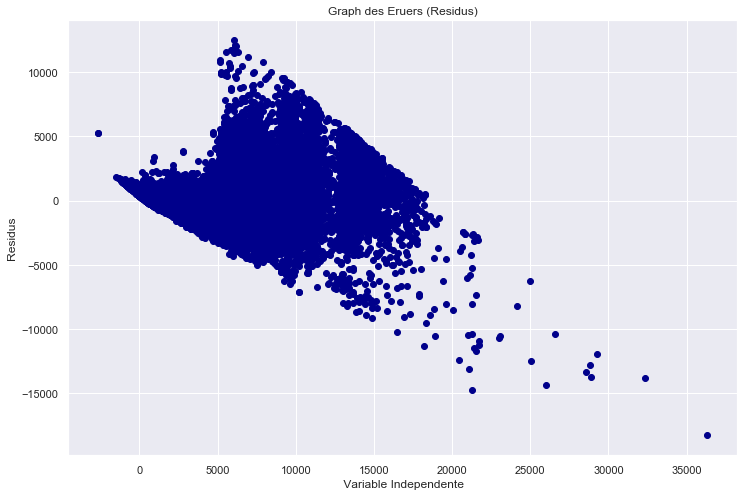

In [11]:
fitted = reg2.fittedvalues.copy()
residuals = reg2.resid
plt.figure(figsize=(12,8))
plt.plot(fitted ,residuals, 'o', color='darkblue')
plt.title("Graph des Eruers (Residus)")
plt.xlabel(" Variable Independente")
plt.ylabel("Residus")

#### On remarque que les erreurs ne sont pas distribuées d'une façon aléatoire, en plus, le graph montre qu'il existe peut-être une  la 
#### heteroscedasticité dans les erreurs, la cause la plus probable est qu’une ou plusieurs variables sont heteroscedastiques par 
#### rapport a variable dépendante "price" ou même que leurs relations ne sont pas linéaires.
#### On peut en déduire que ce modèle n'est pas bon.


### Vérification de la linéarité et de l'homoscedasticité de chaque variable avec la variable dépendante "Price" 

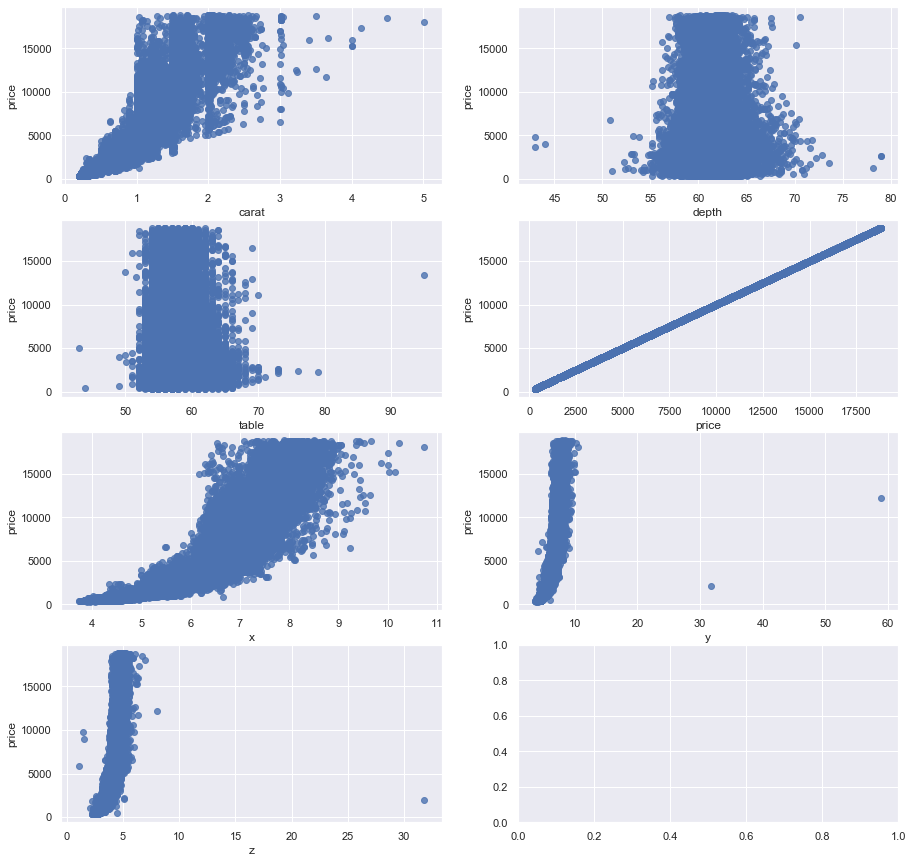

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for i, column in enumerate(data.columns):
    sns.regplot(x =data[column], y = data["price"], fit_reg = False, ax=axes[i//2,i%2])

#### On remarque que les variables "carat" et "x" sont heteroscedastiques par rapport a la variable dépendante "price" 
#### et que la relation entre "price" et "carat" et entre "price" et "x" ne sont pas linéaires 
#### Pour enlever l'heteroscedasticité et assurer la linéarité, on applique la transformation logarithmique pour ces variables.

### Application de la transformation logarithmique

In [13]:
log_data = pd.DataFrame()
log_data ["log_price"] = np.log(data["price"])
log_data ["log_carat"] = np.log(data["carat"])
log_data ["depth"] = data["depth"]
log_data ["table"] = data["table"]
log_data ["log_x"] = np.log(data["x"])
log_data ["y"] = data["y"]
log_data ["z"] = data["z"]
log_data 

,log_price,log_carat,depth,table,log_x,y,z
0,5.786897,-1.469676,61.5,55.0,1.373716,3.98,2.43
1,5.786897,-1.560648,59.8,61.0,1.358409,3.84,2.31
2,5.789960,-1.469676,56.9,65.0,1.398717,4.07,2.31
3,5.811141,-1.237874,62.4,58.0,1.435085,4.23,2.63
4,5.814131,-1.171183,63.3,58.0,1.467874,4.35,2.75
...,...,...,...,...,...,...,...
53935,7.921898,-0.328504,60.8,57.0,1.749200,5.76,3.50
53936,7.921898,-0.328504,63.1,55.0,1.738710,5.75,3.61
53937,7.921898,-0.356675,62.8,60.0,1.733424,5.68,3.56
53938,7.921898,-0.150823,61.0,58.0,1.816452,6.12,3.74


### Vérification de la linéarité de chaque variable avec la variable dépendante "log_price" 

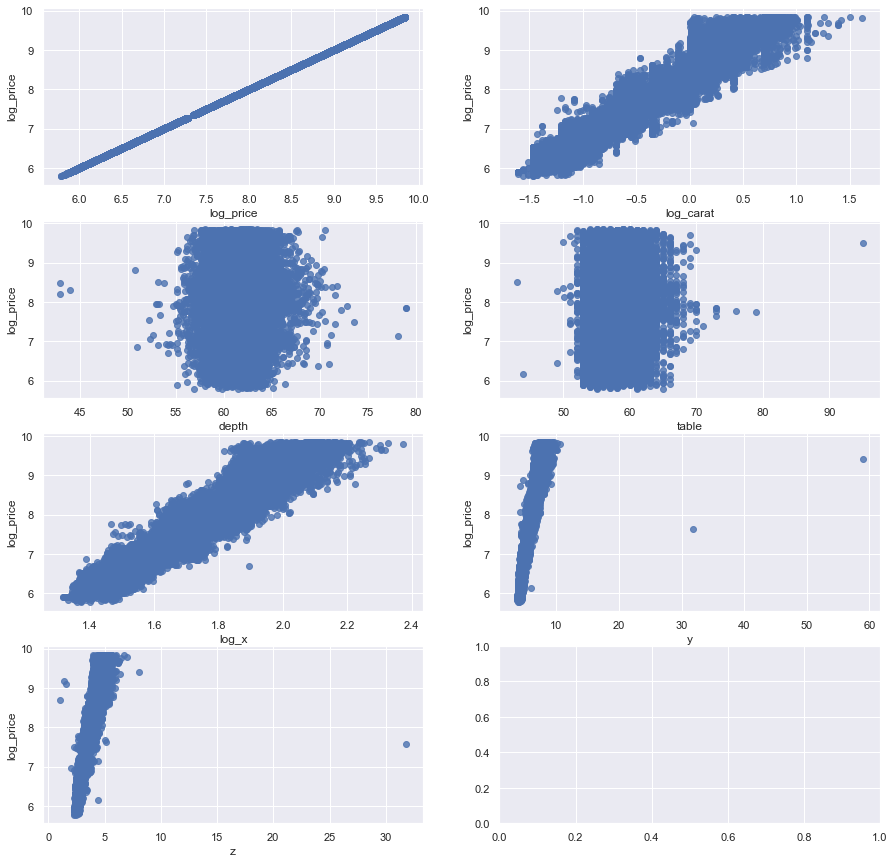

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for i, column in enumerate(log_data.columns):
    sns.regplot(x =log_data[column], y = log_data["log_price"], fit_reg = False, ax=axes[i//2,i%2])

#### La linearité est verifiée
#### L'homoscedasticité est verifié

### 3.9.	Inspection des corrélations entre toutes les variables pour vérifier la "multicolinéarité" a l'aide d'une 
###  matrice des corrélations

Text(0.5, 1, 'Matrice de correlation')

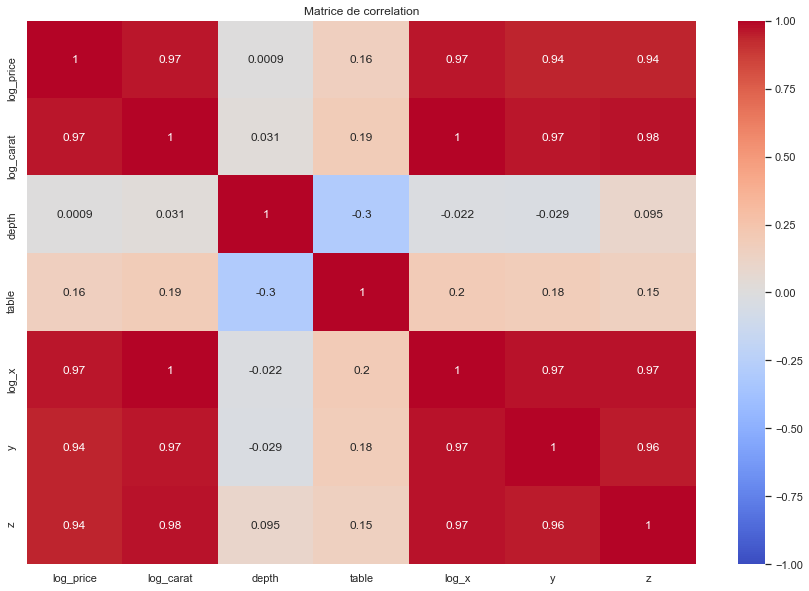

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(log_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Matrice de correlation")

#### On remarque que les variables "log_x", "y" et "z" sont toutes positivement et fortement corrélés entre elles même et avec la 
#### variable "carat", Donc il serait peut-être mieux d'enlever ces trois variables car elles ne rapportent pas plus d'explication dans 
#### notre modèle et pour essentiellement éviter les problèmes de multicolinéarité.

### Estimation du Modèle sans les variables "log_x", "y" et "z" 

In [16]:
y = log_data["log_price"]
x1 = log_data[["log_carat", "depth", "table", "log_x", "y", "z"]]
x = sm.add_constant(x1)
reg3 = sm.OLS(y, x).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.300e+05
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:08:32   Log-Likelihood:                -3458.7
No. Observations:               53920   AIC:                             6931.
Df Residuals:                   53913   BIC:                             6994.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8234      0.373     23.686      0.000       8.093       9.554
log_carat      1.3462      0.051     26.328      0.000       1.246       1.446
depth         -0.0209      0.001    -14.143      0.000      -0.024      -0.018
table         -0.0174      0.001    -31.308      0.000      -0.019      -0.016
log_x          1.0302      0.154      6.697      0.000       0.729       1.332
y              0.0034      0.004      0.794      0.427      -0.005       0.012
z             -0.0024      0.008     -0.300      0.764      -0.018       0.013
==============================================================================
Omnibus:                      802.396   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1459.022
Skew:                           0.082   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Le model est puissant avec un R_Carré = 0.935, et on remarque que la variable "z" avec une p_value = 0.764 >0.05  
#### et la variable "y" avec une p_value = 0.427 >0.05  =>ces deux variable ne sont pas significatives.

### Construction du Modèle sans les variables "log_x", "y" et "z"

In [17]:
y = log_data["log_price"]
x1 = log_data[["log_carat", "depth", "table"]]
x = sm.add_constant(x1)
reg4 = sm.OLS(y, x).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.597e+05
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:08:33   Log-Likelihood:                -3481.7
No. Observations:               53920   AIC:                             6971.
Df Residuals:                   53916   BIC:                             7007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3096      0.067    169.672      0.000      11.179      11.440
log_carat      1.6916      0.002    869.559      0.000       1.688       1.695
depth         -0.0290      0.001    -35.526      0.000      -0.031      -0.027
table         -0.0185      0.001    -34.780      0.000      -0.020      -0.017
==============================================================================
Omnibus:                      814.942   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1478.824
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                       3.792   Cond. No.                     5.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Malgré la suppression de trois variables "log_x", "y" et "z", La puissance explicative de notre modèle na pas diminuée 
####  avec le R_carré precedant = 0.935 qui est egale au R_carré actuel= 0.935, d'ou on garde ce modéle. 

#### Le Modele : log_price = 11.3 + 1.69 * log_carat - 0.029 * depth - 0.0185 * table

### Verification de la distribution des residus

la moyenne des ereurs = 0.0


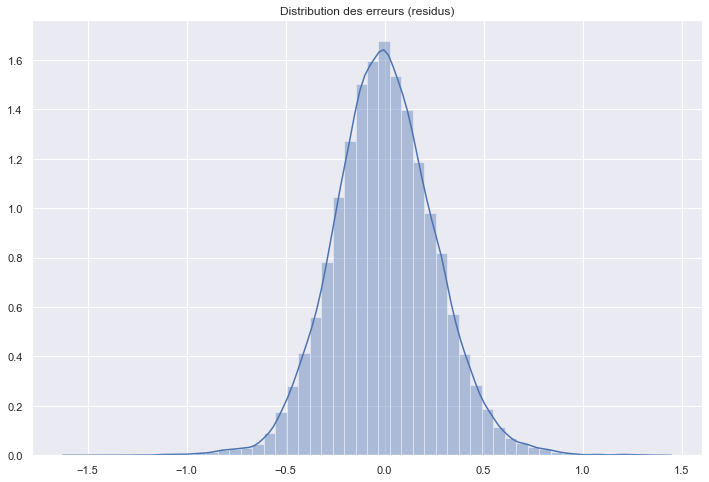

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(reg4.resid)
plt.title("Distribution des erreurs (residus)")
print("la moyenne des ereurs =",np.round(reg4.resid.mean()))

#### La distribution des erreurs est une loi Normale avec une moyenne = 0

Text(0, 0.5, 'Residus')

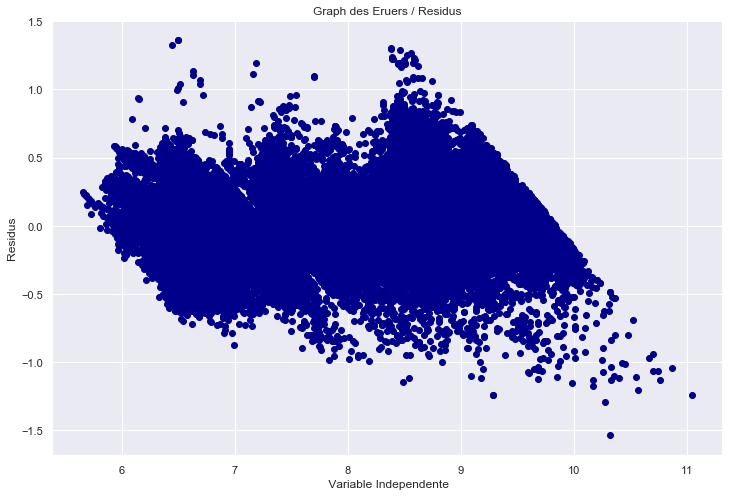

In [19]:
fitted = reg4.fittedvalues.copy()
residuals = reg4.resid
plt.figure(figsize=(12,8))
plt.plot(fitted ,residuals, 'o', color='darkblue')
plt.title("Graph des Eruers / Residus")
plt.xlabel(" Variable Independente")
plt.ylabel("Residus")

#### Le graph ne montre pas des signes d'heteroscedasticité,
#### => Les erreurs sont homoscedastiques

# Deuxième Phase : Modèle avec les variables qualitatives.

### Transformation des variables qualitatives en variables Fictives / Muettes 

In [20]:
data_with_dummies = log_data
data_with_dummies = data_with_dummies.drop("log_x", axis = 1)
data_with_dummies = data_with_dummies.drop("y", axis = 1)
data_with_dummies = data_with_dummies.drop("z", axis = 1)
data_with_dummies["clarity"] = raw_data["clarity"]
data_with_dummies["cut"] = raw_data["cut"]
data_with_dummies["color"] = raw_data["color"]
data_with_dummies = pd.get_dummies(data_with_dummies, columns = ["clarity", "cut", "color"], drop_first = True)

data_with_dummies

,log_price,log_carat,depth,table,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,...,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,5.786897,-1.469676,61.5,55.0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,5.786897,-1.560648,59.8,61.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,5.789960,-1.469676,56.9,65.0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,5.811141,-1.237874,62.4,58.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5.814131,-1.171183,63.3,58.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,7.921898,-0.328504,60.8,57.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
53936,7.921898,-0.328504,63.1,55.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
53937,7.921898,-0.356675,62.8,60.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53938,7.921898,-0.150823,61.0,58.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Estimation du modèle 

In [21]:
y = data_with_dummies["log_price"]
x1 = data_with_dummies[data_with_dummies.columns.difference(['log_price'])]
x = sm.add_constant(x1)
reg5 = sm.OLS(y, x).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.523e+05
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:08:35   Log-Likelihood:                 31963.
No. Observations:               53920   AIC:                        -6.388e+04
Df Residuals:                   53899   BIC:                        -6.370e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.9362      0.043    183.219      0.000       7.851       8.021
clarity_IF        1.1130      0.006    184.079      0.000       1.101       1.125
clarity_SI1       0.5926      0.005    114.838      0.000       0.582       0.603
clarity_SI2       0.4275      0.005     82.365      0.000       0.417       0.438
clarity_VS1       0.8118      0.005    154.003      0.000       0.801       0.822
clarity_VS2       0.7417      0.005    142.906      0.000       0.732       0.752
clarity_VVS1      1.0181      0.006    182.159      0.000       1.007       1.029
clarity_VVS2      0.9468      0.005    174.288      0.000       0.936       0.957
color_E          -0.0542      0.002    -25.600      0.000      -0.058      -0.050
color_F          -0.0946      0.002    -44.141      0.000      -0.099      -0.090
color_G          -0.1601      0.002    -76.348      0.000      -0.164      -0.156
color_H          -0.2509      0.002   -112.728      0.000      -0.255      -0.247
color_I          -0.3724      0.002   -149.362      0.000      -0.377      -0.367
color_J          -0.5108      0.003   -166.125      0.000      -0.517      -0.505
cut_Good          0.0786      0.004     19.757      0.000       0.071       0.086
cut_Ideal         0.1582      0.004     40.003      0.000       0.150       0.166
cut_Premium       0.1368      0.004     35.859      0.000       0.129       0.144
cut_Very Good     0.1149      0.004     30.137      0.000       0.107       0.122
depth            -0.0009      0.000     -1.931      0.054      -0.002    1.39e-05
log_carat         1.8838      0.001   1659.875      0.000       1.882       1.886
table            -0.0004      0.000     -1.017      0.309      -0.001       0.000
==============================================================================
Omnibus:                     3696.693   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15687.200
Skew:                           0.209   Prob(JB):                         0.00
Kurtosis:                       5.609   Cond. No.                     6.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Toutes les variables du modèle sont significatives sauf "depth" avec une p_value = 0.054 > 0.05 et la variable "table" avec une 
#### p_value = 0.309 > 0.05.

### Estimation du modèle sans les variables "depth" et "table" 

In [22]:
y = data_with_dummies["log_price"]
x1 = data_with_dummies[data_with_dummies.columns.difference(['log_price', 'depth', 'table'])]
x = sm.add_constant(x1)
reg6 = sm.OLS(y, x).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.693e+05
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:08:35   Log-Likelihood:                 31961.
No. Observations:               53920   AIC:                        -6.388e+04
Df Residuals:                   53901   BIC:                        -6.372e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8568      0.006   1362.891      0.000       7.846       7.868
clarity_IF        1.1137      0.006    184.434      0.000       1.102       1.125
clarity_SI1       0.5929      0.005    114.942      0.000       0.583       0.603
clarity_SI2       0.4279      0.005     82.487      0.000       0.418       0.438
clarity_VS1       0.8122      0.005    154.231      0.000       0.802       0.823
clarity_VS2       0.7421      0.005    143.067      0.000       0.732       0.752
clarity_VVS1      1.0186      0.006    182.410      0.000       1.008       1.030
clarity_VVS2      0.9472      0.005    174.523      0.000       0.937       0.958
color_E          -0.0542      0.002    -25.600      0.000      -0.058      -0.050
color_F          -0.0945      0.002    -44.135      0.000      -0.099      -0.090
color_G          -0.1602      0.002    -76.405      0.000      -0.164      -0.156
color_H          -0.2511      0.002   -112.834      0.000      -0.255      -0.247
color_I          -0.3725      0.002   -149.483      0.000      -0.377      -0.368
color_J          -0.5110      0.003   -166.237      0.000      -0.517      -0.505
cut_Good          0.0801      0.004     20.592      0.000       0.073       0.088
cut_Ideal         0.1613      0.004     45.442      0.000       0.154       0.168
cut_Premium       0.1394      0.004     38.942      0.000       0.132       0.146
cut_Very Good     0.1172      0.004     32.392      0.000       0.110       0.124
log_carat         1.8837      0.001   1668.528      0.000       1.882       1.886
==============================================================================
Omnibus:                     3725.321   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15922.894
Skew:                           0.210   Prob(JB):                         0.00
Kurtosis:                       5.629   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### - Le modèle est très puissant avec un R_carré ajusté = 0.983, Donc on garde ce modèle
#### - Toutes les variables sont significatives avec une p_value < 0.05
#### - Le modèle est globalement significatif étant donné que la p_value de la f_statistic ( statistique de Fisher ) = 0.00 < 0.05
#### - Le test de Durbin-Watson a une valeur de 1.245 => il existe peut-être une autocorrélation positive des erreurs

### Examination des Erreurs (Residus)

la moyenne des Erreurs (Residus) = 0.0


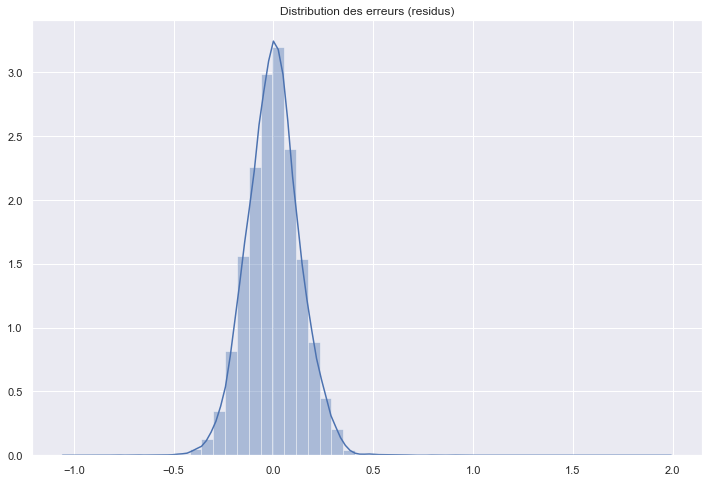

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(reg6.resid)
plt.title("Distribution des erreurs (residus)")
print("la moyenne des Erreurs (Residus) =",np.round(reg6.resid.mean()))

#### La distribution des erreurs est une loi Normale avec une moyenne = 0
#### => La Normalité est vérifiée

Text(0, 0.5, 'Residus')

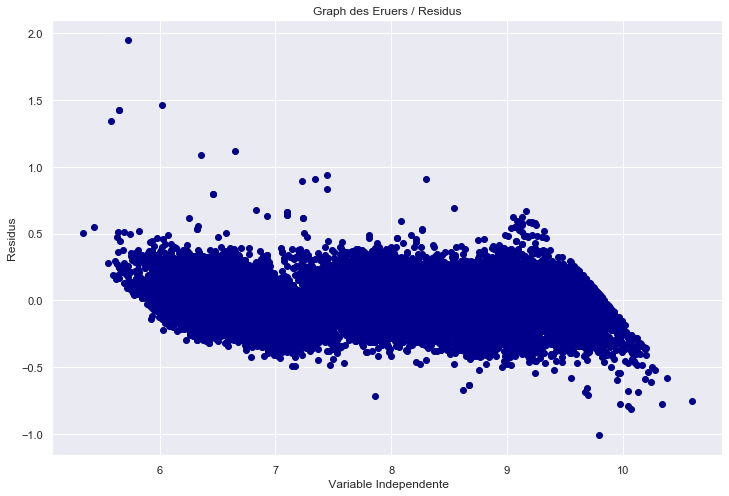

In [24]:
fitted = reg6.fittedvalues.copy()
residuals = reg6.resid
plt.figure(figsize=(12,8))
plt.plot(fitted ,residuals, 'o', color='darkblue')
plt.title("Graph des Eruers / Residus")
plt.xlabel(" Variable Independente")
plt.ylabel("Residus")

#### Le graph ne montre pas des signes d'heteroscedasticité,
#### => Les erreurs sont homoscedastiques